In [63]:
import tensorflow as tf
import numpy as np
import pandas as pd
import keras
import random
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt


#### Ejercicio 1  Si una red neuronal para detectar si una radiografía es de un tórax ha predicho lo siguiente:

    - Para 13 radiografías que eran de tórax , en 8 ha dicho que era un tórax y en 5 ha dicho que no lo era.
    - Para 7 radiografías que no eran un tórax , en 4 ha dicho que no era un tórax y en 3 ha dicho que lo era.

Indica el nº de:

    - Verdaderos Positivos (TP)
    - Verdaderos Negativos (TN)
    - Falsos Positivos (FP)
    - Falsos Negativos (FN)

Dibuja la matriz de confusion

```markdown
| Predicción | Realidad | Cantidad |
|------------|----------|----------|
| TP         | Tórax    | 8        |
| FP         | No Tórax | 3        |
| FN         | Tórax    | 5        |
| TN         | No Tórax | 4        |
```

In [64]:
def plot_matriz_confusion(axes,TP=0,TN=0,FP=0,FN=0,fontsize=15,vpp=None,vpn=None,sensibilidad=None,especificidad=None,f1_score=None,mcc=None,auc=None,prevalencia=None):
    success_color=matplotlib.colors.to_rgb('#9EE548')
    failure_color=matplotlib.colors.to_rgb("#C32240")
    blanco_color=matplotlib.colors.to_rgb("#FFFFFF")


    if ((vpp is not None) |
        (vpn is not None) |
        (sensibilidad is not None) |
        (especificidad is not None) |
        (prevalencia is not None) |
        (f1_score is not None) |
        (mcc is not None) |
        (auc is not None) ):
        show_metrics=True
    else:
        show_metrics=False


    if show_metrics==False:
        axes.imshow([[success_color,failure_color],[failure_color,success_color]])
    else:
        axes.imshow([[success_color,failure_color,blanco_color],[failure_color,success_color,blanco_color],[blanco_color,blanco_color,blanco_color]])



    labels = ['Positivo','Negativo']
    xaxis = np.arange(len(labels))
    axes.set_xticks(xaxis)
    axes.set_yticks(xaxis)
    axes.set_xticklabels(labels, fontsize=13, color="#003B80")
    axes.set_yticklabels(labels, fontsize=13, color="#003B80")
    axes.text(0, 0, str(TP)+" TP",ha="center", va="center", color="#0A2102",fontsize=fontsize)
    axes.text(0, 1, str(FP)+" FP",ha="center", va="center", color="#FAEAEA",fontsize=fontsize)
    axes.text(1, 0, str(FN)+" FN",ha="center", va="center", color="#FAEAEA",fontsize=fontsize)
    axes.text(1, 1, str(TN)+" TN",ha="center", va="center", color="#0A2102",fontsize=fontsize)
    axes.xaxis.tick_top()
    axes.set_xlabel('Predicción', fontsize=fontsize, color="#003B80")
    axes.xaxis.set_label_position('top')
    axes.set_ylabel('Realidad', fontsize=fontsize, color="#003B80")


    if show_metrics==True:


        if (vpp is not None):
            axes.text(0, 2, f"Precision\n{vpp:.2f}",ha="center", va="center", color="#0A2102",fontsize=fontsize-4)
        if (vpn is not None):
            axes.text(1, 2, f"VPN\n{vpn:.2f}",ha="center", va="center", color="#0A2102",fontsize=fontsize-4)
        if (sensibilidad is not None):
            axes.text(2, 0, f"Sensibilidad\n{sensibilidad:.2f}",ha="center", va="center", color="#0A2102",fontsize=fontsize-4)
        if (especificidad is not None):
            axes.text(2, 1, f"Especificidad\n{especificidad:.2f}",ha="center", va="center", color="#0A2102",fontsize=fontsize-4)

        metricas_generales=""
        if (prevalencia is not None):
            metricas_generales=metricas_generales+f"Prevalencia\n{prevalencia:.2f}\n"
        if (f1_score is not None):
            metricas_generales=metricas_generales+f"F1-score\n{f1_score:.2f}\n"
        if (mcc is not None):
            metricas_generales=metricas_generales+f"MCC\n{mcc:.2f}\n"
        if (auc is not None):
            metricas_generales=metricas_generales+f"AUC\n{auc:.2f}"

        axes.text(2, 2, metricas_generales,ha="center", va="center", color="#0A2102",fontsize=fontsize-4)

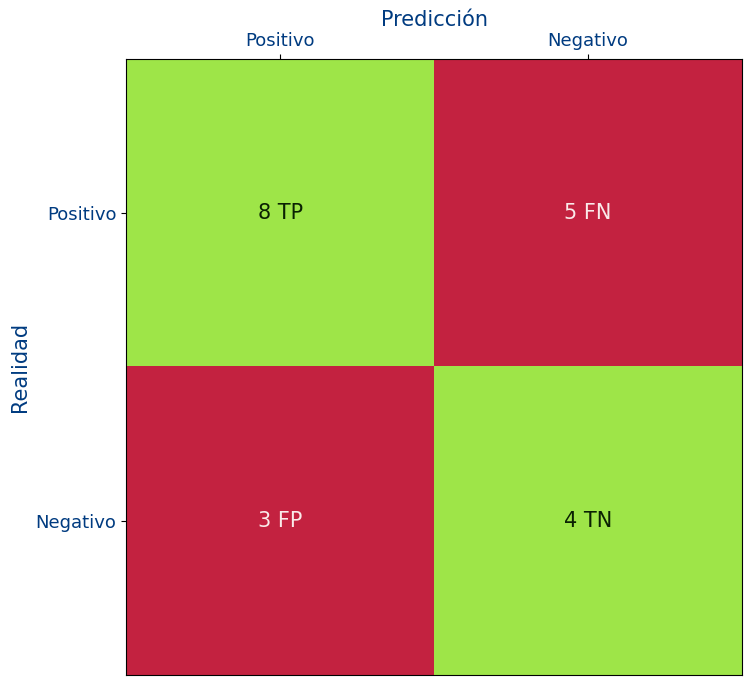

In [65]:
# Crear una figura y un objeto de ejes
fig, ax = plt.subplots(figsize=(8, 8))  # Configura el tamaño de la figura

# Llamar a la función pasando el objeto `ax` como `axes`
plot_matriz_confusion(
    axes=ax,
    TP=8, TN=4, FP=3, FN=5,
    fontsize=15
)

# Mostrar el gráfico
plt.show()

#### Ejercicio 2.A Seguimos con la red neuronal que predice si una radiografía es de tórax.
#### Si para 10 imágenes ha sacado los siguientes resultados:

**y_score=np.array([0.27, 0.45,  0.76,  0.55,  0.28, 0.04, 0.34,0.4, 0.66, 0.88, 0.94,0.47,0.2])**

#### Indica para cada valor predicho , si ha predicho que era una imagen de tórax o no.


In [66]:
y_score = np.array([0.27, 0.45, 0.76, 0.55, 0.28, 0.04, 0.34, 0.4, 0.66, 0.88, 0.94, 0.47, 0.2])
threshold = 0.5
predictions = ['Tórax' if score > threshold else 'No Tórax' for score in y_score]

for i, prediction in enumerate(predictions):
    print(f"Imagen {i+1}: {prediction}")

Imagen 1: No Tórax
Imagen 2: No Tórax
Imagen 3: Tórax
Imagen 4: Tórax
Imagen 5: No Tórax
Imagen 6: No Tórax
Imagen 7: No Tórax
Imagen 8: No Tórax
Imagen 9: Tórax
Imagen 10: Tórax
Imagen 11: Tórax
Imagen 12: No Tórax
Imagen 13: No Tórax


#### Ejercicio 2.B Ejercicio 2.B

#### Seguimos con la red neuronal que predice si una radiografía es de tórax.

#### Si para 10 imágenes ha sacado los siguientes resultados:
	
**y_score=np.array([0.27, 0.45,  0.76,  0.55,  0.28, 0.04, 0.34,0.4, 0.66, 0.88, 0.94,0.47,0.2])**

#### Pero los valores verdaderos son los siguientes:
	
**y_true=np.array([1,0,1,0,0,0,1,0,1,1,1,1,0])**

#### Indica el nº de:

    Verdaderos Positivos (TP)
    Verdaderos Negativos (TN)
    Falsos Positivos (FP)
    Falsos Negativos (FN)

#### Dibuja la matriz de confusión

Verdaderos Positivos (TP): 4
Verdaderos Negativos (TN): 5
Falsos Positivos (FP): 1
Falsos Negativos (FN): 3


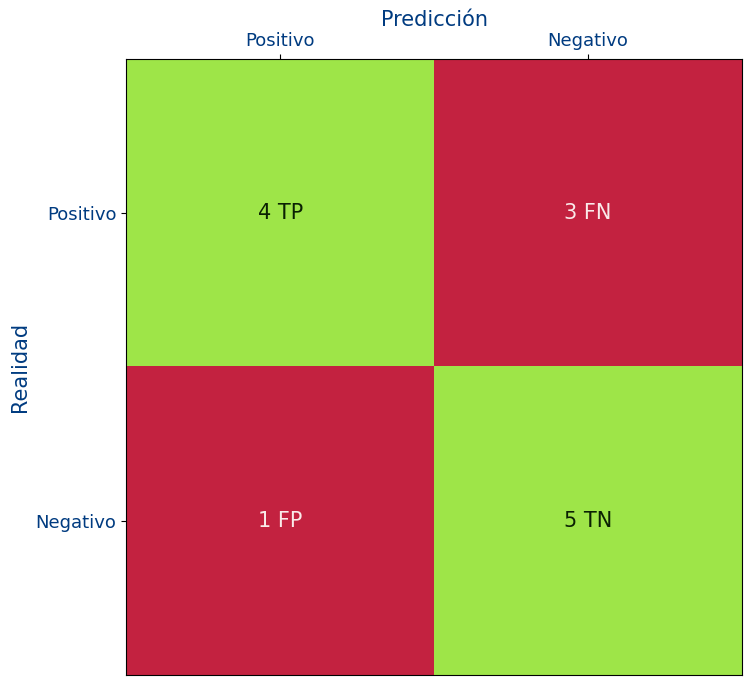

In [67]:
y_true = np.array([1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0])
y_score=np.array([0.27, 0.45,  0.76,  0.55,  0.28, 0.04, 0.34,0.4, 0.66, 0.88, 0.94,0.47,0.2])
threshold = 0.5


# Calculo de TP, TN, FP, FN
TP = np.sum((y_score > threshold) & (y_true == 1))
TN = np.sum((y_score <= threshold) & (y_true == 0))
FP = np.sum((y_score > threshold) & (y_true == 0))
FN = np.sum((y_score <= threshold) & (y_true == 1))

print(f"Verdaderos Positivos (TP): {TP}")
print(f"Verdaderos Negativos (TN): {TN}")
print(f"Falsos Positivos (FP): {FP}")
print(f"Falsos Negativos (FN): {FN}")

# Dibujo de la matriz de confusión
fig, ax = plt.subplots(figsize=(8, 8))  # Configura el tamaño de la figura

plot_matriz_confusion(
    axes=ax,
    TP=TP, TN=TN, FP=FP, FN=FN,
    fontsize=15
)

# Mostrar el gráfico
plt.show()

#### Ejercicio 2.C Siguiendo con los datos anteriores y suponiendo que el umbral es 0.5:
- **y_true=np.array([1,0,1,0,0,0,1,0,1,1,1,1,0])**
- **y_score=np.array([0.27, 0.45,  0.76,  0.55,  0.28, 0.04, 0.34,0.4, 0.66, 0.88, 0.94,0.47,0.2])**
#### Calcula directamente las siguientes métricas:
- Prevalencia
- Sensibilidad
- Especificidad
- VPP
- VPN


In [68]:
# Valores de la matriz de confusión
TP = 4  # Verdaderos Positivos
FN = 3  # Falsos Negativos
FP = 1  # Falsos Positivos
TN = 5  # Verdaderos Negativos

# Cálculo de las métricas
prevalencia = (TP + FN) / (TP + FN + FP + TN)
sensibilidad = TP / (TP + FN)
especificidad = TN / (TN + FP)
VPP = TP / (TP + FP)  # Valor Predictivo Positivo (Precisión)
VPN = TN / (TN + FN)  # Valor Predictivo Negativo

# Mostrar resultados
print(f"Prevalencia: {prevalencia:.4f}")
print(f"Sensibilidad (Recall): {sensibilidad:.4f}")
print(f"Especificidad: {especificidad:.4f}")
print(f"Valor Predictivo Positivo (Precisión): {VPP:.4f}")
print(f"Valor Predictivo Negativo: {VPN:.4f}")

Prevalencia: 0.5385
Sensibilidad (Recall): 0.5714
Especificidad: 0.8333
Valor Predictivo Positivo (Precisión): 0.8000
Valor Predictivo Negativo: 0.6250


#### Ejercicio 3.A  Crea una red neuronal con los datos de bread cancer con las siguientes características:
- neuronas por capa:[30,64,32,16,8,1]
- Función de activation: ELU
- Nº de epocas: 20
- Optimizador: Adam con tasa de aprendizaje de 0,0001
#### Muestra las siguientes métricas durante el entrenamiento (para cada una de las épocas): 
- Loss
- Sensibilidad
- Especificad

In [69]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

In [70]:
# Cargar datos
data = load_breast_cancer()
X, y = data.data, data.target

# Normalización de los datos
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [71]:
# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo de red neuronal
model3 = models.Sequential([
    layers.Dense(30, activation="elu", input_shape=(X.shape[1],)),
    layers.Dense(64, activation="elu"),
    layers.Dense(32, activation="elu"),
    layers.Dense(16, activation="elu"),
    layers.Dense(8, activation="elu"),
    layers.Dense(1, activation="sigmoid")  # Salida para clasificación binaria
])

# Compilar el modelo
model3.compile(optimizer=Adam(learning_rate=0.0001), loss="binary_crossentropy", metrics=["accuracy"])

/home/feliciano/miniconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [72]:
# Función para calcular sensibilidad y especificidad
def sensitivity_specificity(y_true, y_pred):
    y_pred = np.where(y_pred >= 0.5, 1, 0)  # Convertir probabilidades a etiquetas (umbral 0.5)
    TP = np.sum((y_true == 1) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    
    sensibilidad = TP / (TP + FN) if (TP + FN) > 0 else 0
    especificidad = TN / (TN + FP) if (TN + FP) > 0 else 0
    
    return sensibilidad, especificidad

In [73]:
# Entrenar el modelo y calcular métricas por época
epochs = 20
for epoch in range(epochs):
    history = model3.fit(X_train, y_train, epochs=1, batch_size=32, verbose=0)  # Entrenar 1 época

    # Obtener predicciones
    y_pred_train = model3.predict(X_train, verbose=0).flatten()
    
    # Calcular métricas
    sensibilidad, especificidad = sensitivity_specificity(y_train, y_pred_train)
    loss = history.history["loss"][0]
    
    # Mostrar resultados de la época
    print(f"Época {epoch+1}/{epochs} - Loss: {loss:.4f} - Sensibilidad: {sensibilidad:.4f} - Especificidad: {especificidad:.4f}")


Época 1/20 - Loss: 0.7447 - Sensibilidad: 0.6049 - Especificidad: 0.6627
Época 2/20 - Loss: 0.6004 - Sensibilidad: 0.8322 - Especificidad: 0.7692
Época 3/20 - Loss: 0.4958 - Sensibilidad: 0.8951 - Especificidad: 0.7988
Época 4/20 - Loss: 0.4212 - Sensibilidad: 0.9301 - Especificidad: 0.8166
Época 5/20 - Loss: 0.3665 - Sensibilidad: 0.9336 - Especificidad: 0.8639
Época 6/20 - Loss: 0.3236 - Sensibilidad: 0.9336 - Especificidad: 0.8994
Época 7/20 - Loss: 0.2903 - Sensibilidad: 0.9441 - Especificidad: 0.8935
Época 8/20 - Loss: 0.2626 - Sensibilidad: 0.9545 - Especificidad: 0.8994
Época 9/20 - Loss: 0.2401 - Sensibilidad: 0.9580 - Especificidad: 0.9053
Época 10/20 - Loss: 0.2202 - Sensibilidad: 0.9790 - Especificidad: 0.9112
Época 11/20 - Loss: 0.2041 - Sensibilidad: 0.9790 - Especificidad: 0.9290
Época 12/20 - Loss: 0.1895 - Sensibilidad: 0.9825 - Especificidad: 0.9231
Época 13/20 - Loss: 0.1767 - Sensibilidad: 0.9825 - Especificidad: 0.9231
Época 14/20 - Loss: 0.1658 - Sensibilidad: 0.98

#### Ejercicio 3.B 

#### En este ejercicio vamos a mostrar la matriz de confusión de la red que acabamos de crear.

#### Para ello vamos a usar los valores de test que los tenemos en las siguientes variables del ejercicio anterior:

- x_test
- y_test

#### La variable y_test es lo que llamamos y_true mientras que con x_test obtendremos y_score.

#### Para ello sigue los siguientes pasos:

- Crea una función llamada get_matriz_confusion(y_true,y_score,threshold) que retorne TP ,TN, FP y FN
- Calcula y_score usando el método predict del modelo y usando la variable x_test
- Haz que y_true sea igual a y_test
- Llama a la función get_matriz_confusion
- Muestra la matriz de confusión



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


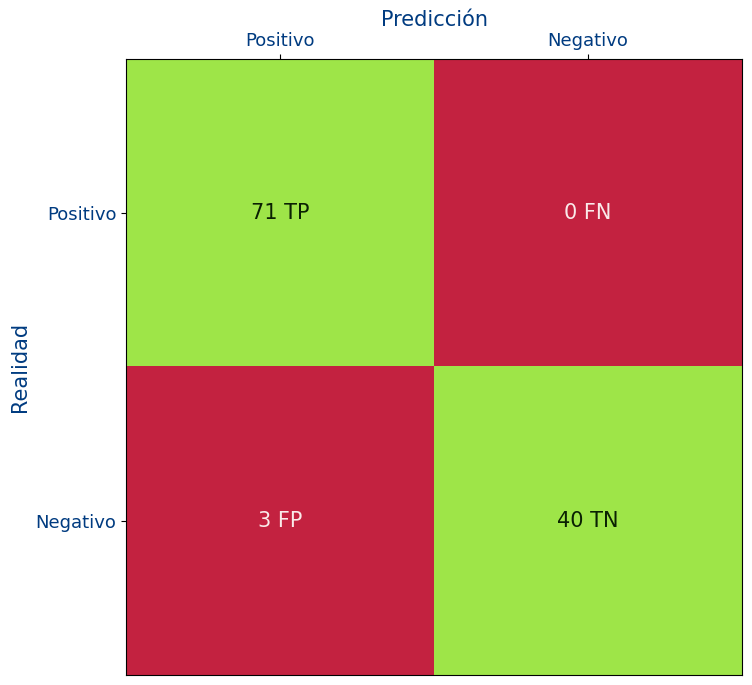

In [74]:
def get_matriz_confusion(y_true, y_score, threshold=0.5):
    y_pred = (y_score >= threshold).astype(int)
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    return TP, TN, FP, FN

# Calcular y_score usando el método predict del modelo y usando la variable X_test
y_score = model3.predict(X_test).flatten()

# Hacer que y_true sea igual a y_test
y_true = y_test

# Llamar a la función get_matriz_confusion
TP, TN, FP, FN = get_matriz_confusion(y_true, y_score, threshold)

# Mostrar la matriz de confusión
fig, ax = plt.subplots(figsize=(8, 8))  # Configura el tamaño de la figura

plot_matriz_confusion(
    axes=ax,
    TP=TP, TN=TN, FP=FP, FN=FN,
    fontsize=15
)

# Mostrar el gráfico
plt.show()

#### Ejercicio 3.C
#### Crea una función llamada `get_metrics(TP, TN, FP, FN, Prevalencia=None)` que retorne las siguientes métricas:

- Sensibilidad
- Especificidad
- VPP
- VPN
- Prevalencia

#### Para calcular VPP y VPN se debe usar la prevalencia. Si no se pasa el valor de prevalencia (es decir, `prevalencia==None`), se usará el de los datos y sino se usará la prevalencia que se pase como argumento.

#### Usando los valores de TP, TN, FP y FN del ejercicio anterior, muestra las métricas que retorna `get_metrics`.

#### Muestra todo en la matriz de confusión.

Sensibilidad: 0.9718
Especificidad: 0.9767
Valor Predictivo Positivo (VPP): 0.9857
Valor Predictivo Negativo (VPN): 0.9545
Prevalencia: 0.6228


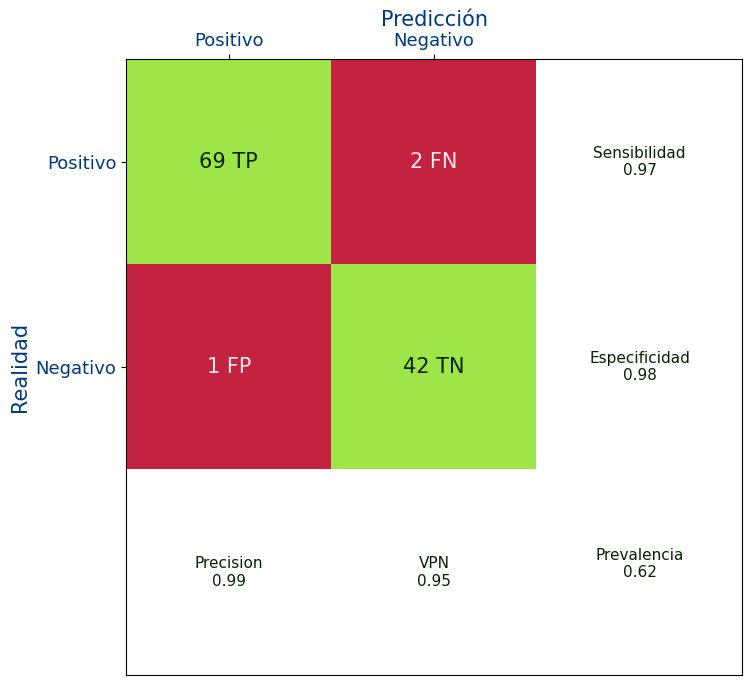

In [75]:
def get_metrics(TP, TN, FP, FN, Prevalencia=None):
    # Calcular sensibilidad y especificidad
    sensibilidad = TP / (TP + FN) if (TP + FN) > 0 else 0
    especificidad = TN / (TN + FP) if (TN + FP) > 0 else 0
    
    # Calcular prevalencia si no se pasa como argumento
    if Prevalencia is None:
        Prevalencia = (TP + FN) / (TP + TN + FP + FN)
    
    # Calcular VPP y VPN usando la prevalencia
    VPP = (sensibilidad * Prevalencia) / ((sensibilidad * Prevalencia) + ((1 - especificidad) * (1 - Prevalencia)))
    VPN = (especificidad * (1 - Prevalencia)) / (((1 - sensibilidad) * Prevalencia) + (especificidad * (1 - Prevalencia)))
    
    return sensibilidad, especificidad, VPP, VPN, Prevalencia

# Usar los valores de TP, TN, FP y FN del ejercicio anterior
TP = np.int64(69)
TN = np.int64(42)
FP = np.int64(1)
FN = np.int64(2)

# Obtener las métricas
sensibilidad, especificidad, VPP, VPN, prevalencia = get_metrics(TP, TN, FP, FN)

# Mostrar las métricas
print(f"Sensibilidad: {sensibilidad:.4f}")
print(f"Especificidad: {especificidad:.4f}")
print(f"Valor Predictivo Positivo (VPP): {VPP:.4f}")
print(f"Valor Predictivo Negativo (VPN): {VPN:.4f}")
print(f"Prevalencia: {prevalencia:.4f}")

# Mostrar la matriz de confusión con las métricas
fig, ax = plt.subplots(figsize=(8, 8))  # Configura el tamaño de la figura

plot_matriz_confusion(
    axes=ax,
    TP=TP, TN=TN, FP=FP, FN=FN,
    fontsize=15,
    vpp=VPP, vpn=VPN, sensibilidad=sensibilidad, especificidad=especificidad, prevalencia=prevalencia
)

# Mostrar el gráfico
plt.show()

#### Ejercicio 3.D
- Guarda el modelo a disco

In [76]:
# Guardar el modelo a disco
model3.save('modelo_breast_cancer.h5')

#### Ejercicio 3.E
- En un nuevo jupyter notebook, carga el modelo y con los datos de test , vuelve a mostrar la matriz de confusión con todas las métricas.

#### Ejercicio 3.F
#### Muestra ahora 1 gráfica, en la que se mostrará:

- El valor de la sensibilidad y la especificidad según el valor del umbral

#### ¿Que valor de umbral dejarías?

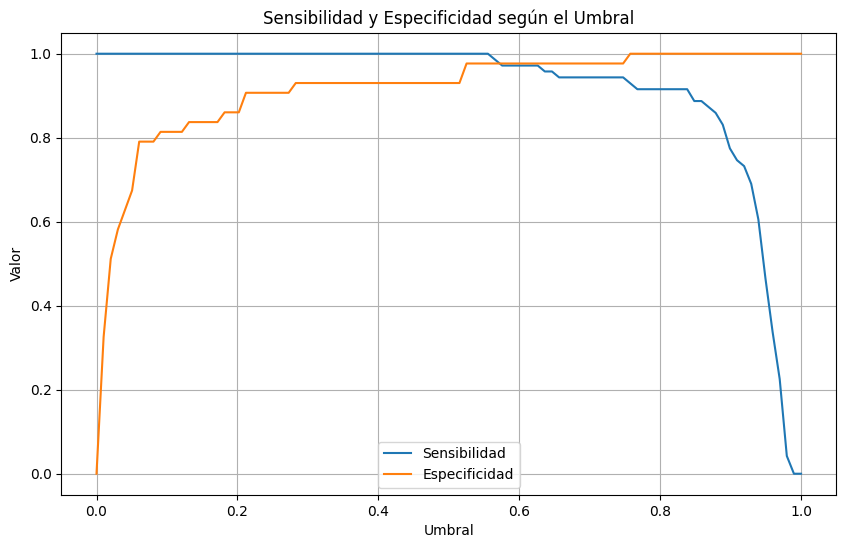

In [77]:
# Definir una función para calcular sensibilidad y especificidad para diferentes umbrales
def calculate_metrics_for_thresholds(y_true, y_score, thresholds):
    sensitivities = []
    specificities = []
    
    for threshold in thresholds:
        TP = np.sum((y_score >= threshold) & (y_true == 1))
        TN = np.sum((y_score < threshold) & (y_true == 0))
        FP = np.sum((y_score >= threshold) & (y_true == 0))
        FN = np.sum((y_score < threshold) & (y_true == 1))
        
        sensibilidad = TP / (TP + FN) if (TP + FN) > 0 else 0
        especificidad = TN / (TN + FP) if (TN + FP) > 0 else 0
        
        sensitivities.append(sensibilidad)
        specificities.append(especificidad)
    
    return sensitivities, specificities

# Definir los umbrales a evaluar
thresholds = np.linspace(0, 1, 100)

# Calcular las métricas para cada umbral
sensitivities, specificities = calculate_metrics_for_thresholds(y_true, y_score, thresholds)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(thresholds, sensitivities, label='Sensibilidad')
plt.plot(thresholds, specificities, label='Especificidad')
plt.xlabel('Umbral')
plt.ylabel('Valor')
plt.title('Sensibilidad y Especificidad según el Umbral')
plt.legend()
plt.grid(True)
plt.show()

#### Ejercicio 4
#### Indica en los siguientes problemas si subirías o bajarías el umbral

- Una IA que detecta si hay petroleo en el subsuelo
- Una IA que predice si un usuario en Amazon está cometiendo fraude
- Una IA que decide si te concede un préstamo
- Una IA que decide una persona en un juicio es inocente
- Una IA que corrige automáticamente un examen y te dice si has aprobado

- Una IA que detecta si hay petroleo en el subsuelo
    - **Bajar el umbral**: Preferimos tener más falsos positivos (pensar que hay petróleo cuando no lo hay) que falsos negativos (no detectar petróleo cuando sí lo hay).

- Una IA que predice si un usuario en Amazon está cometiendo fraude
    - **Bajar el umbral**: Es mejor detectar más posibles fraudes, incluso si eso significa tener más falsos positivos, para evitar pérdidas económicas.

- Una IA que decide si te concede un préstamo
    - **Subir el umbral**: Es importante minimizar los falsos positivos (conceder préstamos a personas que no pueden pagarlos) para reducir el riesgo financiero.

- Una IA que decide una persona en un juicio es inocente
    - **Subir el umbral**: Minimizar los falsos positivos (declarar inocente a una persona culpable) para asegurar la justicia.

- Una IA que corrige automáticamente un examen y te dice si has aprobado
    - **Bajar el umbral**: Es preferible tener más falsos positivos (aprobar a alguien que no debería) que falsos negativos (no aprobar a alguien que sí debería), para dar el beneficio de la duda a los estudiantes.

#### Ejercicio 5.A
#### Crea una nueva red neuronal para el problema del bread cancer

#### Ahora razona con cual de las 2 redes te quedarías y que threshold elegirías para cada uno de ellos.

#### Para elegir debes mostrar gráficas , una al lado de la otra para comparar lo siguiente:

- Gráficos de perdida, sensibilida y especificidad durante el entrenamiento
- Matriz de confusión con las métricas: Sensibilidad, Especificidad, VPP, VPN, Prevalencia
- Threshold vs (Sensibilidad y Especificidad)
- Threshold vs Informedness (Muestra en el label el máximo)
#### ¿Con que red te quedarías?

/home/feliciano/miniconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━

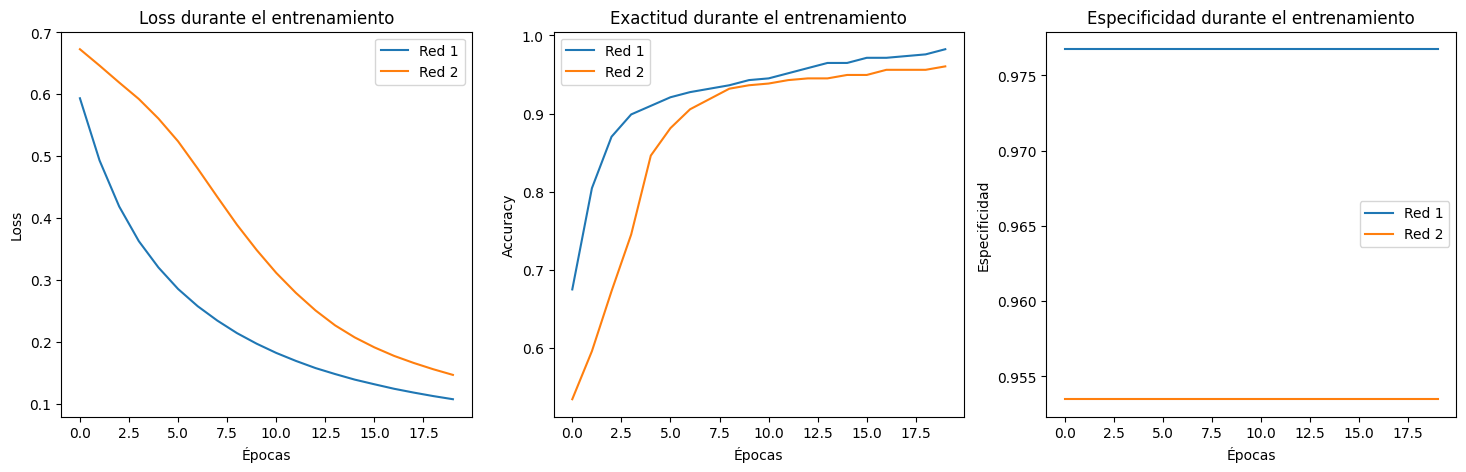

📌 Matriz de confusión y métricas para Red 1:
Sensibilidad: 0.9718, Especificidad: 0.9767, VPP: 0.9857, VPN: 0.9545, Prevalencia: 0.6228
Confusión: TN=42, FP=1, FN=2, TP=69

📌 Matriz de confusión y métricas para Red 2:
Sensibilidad: 1.0000, Especificidad: 0.9535, VPP: 0.9726, VPN: 1.0000, Prevalencia: 0.6228
Confusión: TN=41, FP=2, FN=0, TP=71



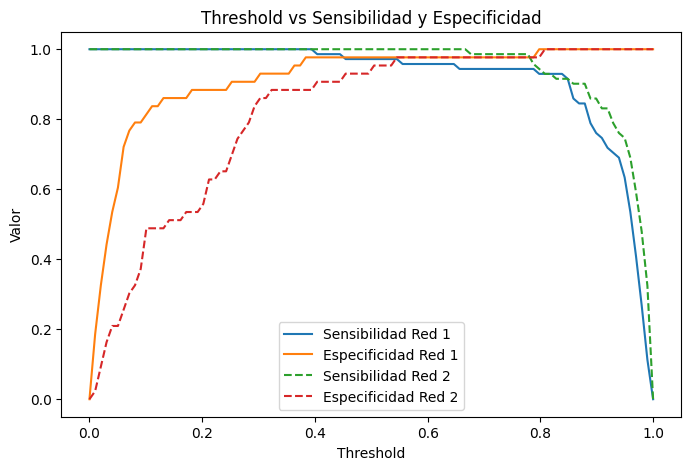

In [78]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve
import matplotlib.pyplot as plt

# Cargar datos
data = load_breast_cancer()
X, y = data.data, data.target

# Normalización de los datos
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 Definir la primera red neuronal (Red 1)
def build_model_1():
    model = models.Sequential([
        layers.Dense(30, activation="elu", input_shape=(X.shape[1],)),
        layers.Dense(64, activation="elu"),
        layers.Dense(32, activation="elu"),
        layers.Dense(16, activation="elu"),
        layers.Dense(8, activation="elu"),
        layers.Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer=Adam(learning_rate=0.0001), loss="binary_crossentropy", metrics=["accuracy"])
    return model

# 📌 Definir la segunda red neuronal (Red 2) - Modificación de arquitectura
def build_model_2():
    model = models.Sequential([
        layers.Dense(16, activation="relu", input_shape=(X.shape[1],)),
        layers.Dense(8, activation="relu"),
        layers.Dense(4, activation="relu"),
        layers.Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer=Adam(learning_rate=0.0005), loss="binary_crossentropy", metrics=["accuracy"])
    return model

# 📌 Entrenar ambas redes
epochs = 20
batch_size = 32

model1 = build_model_1()
history1 = model1.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=0)

model2 = build_model_2()
history2 = model2.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=0)

# 📌 Función para calcular métricas
def calculate_metrics(y_true, y_pred, threshold=0.5):
    y_pred_bin = (y_pred >= threshold).astype(int)
    TN, FP, FN, TP = confusion_matrix(y_true, y_pred_bin).ravel()
    sensibilidad = TP / (TP + FN) if (TP + FN) > 0 else 0
    especificidad = TN / (TN + FP) if (TN + FP) > 0 else 0
    VPP = TP / (TP + FP) if (TP + FP) > 0 else 0
    VPN = TN / (TN + FN) if (TN + FN) > 0 else 0
    prevalencia = (TP + FN) / len(y_true)
    return sensibilidad, especificidad, VPP, VPN, prevalencia, TN, FP, FN, TP

# 📌 Obtener predicciones
y_pred1 = model1.predict(X_test).flatten()
y_pred2 = model2.predict(X_test).flatten()

# 📌 Calcular métricas para threshold = 0.5
metrics1 = calculate_metrics(y_test, y_pred1)
metrics2 = calculate_metrics(y_test, y_pred2)

# 📌 Graficar métricas durante entrenamiento
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Pérdida
axs[0].plot(history1.history["loss"], label="Red 1")
axs[0].plot(history2.history["loss"], label="Red 2")
axs[0].set_title("Loss durante el entrenamiento")
axs[0].set_xlabel("Épocas")
axs[0].set_ylabel("Loss")
axs[0].legend()

# Sensibilidad
axs[1].plot(history1.history["accuracy"], label="Red 1")
axs[1].plot(history2.history["accuracy"], label="Red 2")
axs[1].set_title("Exactitud durante el entrenamiento")
axs[1].set_xlabel("Épocas")
axs[1].set_ylabel("Accuracy")
axs[1].legend()

# Especificidad (Se calcula manualmente)
axs[2].plot(range(epochs), [calculate_metrics(y_test, model1.predict(X_test).flatten())[1] for _ in range(epochs)], label="Red 1")
axs[2].plot(range(epochs), [calculate_metrics(y_test, model2.predict(X_test).flatten())[1] for _ in range(epochs)], label="Red 2")
axs[2].set_title("Especificidad durante el entrenamiento")
axs[2].set_xlabel("Épocas")
axs[2].set_ylabel("Especificidad")
axs[2].legend()

plt.show()

# 📌 Matriz de confusión con métricas
print("📌 Matriz de confusión y métricas para Red 1:")
print(f"Sensibilidad: {metrics1[0]:.4f}, Especificidad: {metrics1[1]:.4f}, VPP: {metrics1[2]:.4f}, VPN: {metrics1[3]:.4f}, Prevalencia: {metrics1[4]:.4f}")
print(f"Confusión: TN={metrics1[5]}, FP={metrics1[6]}, FN={metrics1[7]}, TP={metrics1[8]}\n")

print("📌 Matriz de confusión y métricas para Red 2:")
print(f"Sensibilidad: {metrics2[0]:.4f}, Especificidad: {metrics2[1]:.4f}, VPP: {metrics2[2]:.4f}, VPN: {metrics2[3]:.4f}, Prevalencia: {metrics2[4]:.4f}")
print(f"Confusión: TN={metrics2[5]}, FP={metrics2[6]}, FN={metrics2[7]}, TP={metrics2[8]}\n")

# 📌 Threshold vs Sensibilidad y Especificidad
thresholds = np.linspace(0, 1, 100)
sens1, spec1, sens2, spec2 = [], [], [], []

for t in thresholds:
    s1, e1, *_ = calculate_metrics(y_test, y_pred1, t)
    s2, e2, *_ = calculate_metrics(y_test, y_pred2, t)
    sens1.append(s1)
    spec1.append(e1)
    sens2.append(s2)
    spec2.append(e2)

plt.figure(figsize=(8, 5))
plt.plot(thresholds, sens1, label="Sensibilidad Red 1")
plt.plot(thresholds, spec1, label="Especificidad Red 1")
plt.plot(thresholds, sens2, label="Sensibilidad Red 2", linestyle="dashed")
plt.plot(thresholds, spec2, label="Especificidad Red 2", linestyle="dashed")
plt.xlabel("Threshold")
plt.ylabel("Valor")
plt.legend()
plt.title("Threshold vs Sensibilidad y Especificidad")
plt.show()